In [15]:
import proj1 as pr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
## as the dataset is 1.22GB, I am not submitting with the project here 
## since I only use the last days' entries for each county in the country, the
## dataset I use is much smaller and have submitted it with the project

## I did create a function to process the raw 1.22GB data set into the modified form needed here
## but it can also be loaded into pandas directly from the 'modified_dataset.csv' file

#df = pr.create_national_dataset() ## this requires the full dataset in the directory
#df.to_csv('modified_dataset.csv')

df = pd.read_csv('modified_dataset.csv', index_col=[0])

In [17]:
df.shape

(3218, 193)

In [18]:
##PREPROCESSING

In [19]:
#remove non-numerical columns
rem_col = ['fips', 'date', 'county', 'state', 'cases', 'deaths', 'stay_at_home_announced', 'date_stay_at_home_announced', 'stay_at_home_effective', 'date_stay_at_home_effective', 'CALL', 'presence_of_water_violation', 'deaths_per_1000']
df = df[[col for col in df.columns if col not in rem_col]]

#remove blank rows 
df = df.dropna(axis=0, how='all')

In [20]:
#create X and y matrices
X = df[[col for col in df.columns if col != 'cases_per_1000']]
y = np.array(df['cases_per_1000']).reshape(-1,1)

In [21]:
#impute the mean into missing values in each column
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp.fit_transform(X)

In [22]:
#scale and center the data
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalery = StandardScaler()

X_scaled = scalerX.fit_transform(X_imp)
y_scaled = scalery.fit_transform(y)

In [23]:
#create training and testing sets - using 80/20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state=54, test_size=.2)

#check sizes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2507, 179)
(627, 179)
(2507, 1)
(627, 1)


In [24]:
## LINEAR REGRESSION

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

print(lin_reg.get_params())
print()
print(f'R^2 score for linear regression model is {lin_reg.score(X_test, y_test)}')
print(f'Mean squared error for linear regression model is {mean_squared_error(y_test, y_pred)}')

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'normalize': False}

R^2 score for linear regression model is 0.4592268175933261
Mean squared error for linear regression model is 0.5914679826657299


In [26]:
## RIDGE REGRESSOR

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0, fit_intercept=False)
ridge.fit(X_train, y_train)
yr_pred = ridge.predict(X_test)

print(ridge.get_params())
print()
print(f'R^2 score for ridge regressor model is {ridge.score(X_test, y_test)}')
print(f'Mean squared error for ridge regressor model is {mean_squared_error(y_test, yr_pred)}')

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': False, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}

R^2 score for ridge regressor model is 0.456650600805797
Mean squared error for ridge regressor model is 0.5942857069830638


In [28]:
##testing again with a different alpha

ridge = Ridge(alpha=100.0, fit_intercept=False)
ridge.fit(X_train, y_train)
yr_pred = ridge.predict(X_test)

print(ridge.get_params())
print()
print(f'R^2 score for ridge regressor model is {ridge.score(X_test, y_test)}')
print(f'Mean squared error for ridge regressor model is {mean_squared_error(y_test, yr_pred)}')

{'alpha': 100.0, 'copy_X': True, 'fit_intercept': False, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}

R^2 score for ridge regressor model is 0.47132220240759354
Mean squared error for ridge regressor model is 0.5782387155933096


In [29]:
## RIDGE with Cross validation

In [30]:
from sklearn.linear_model import RidgeCV
r_alphas = np.linspace(50,150, 11)
rcv = RidgeCV(alphas=r_alphas, fit_intercept=False)
rcv.fit(X_train, y_train)
yrcv_pred = rcv.predict(X_test)

print(rcv.get_params())
print()
print(f'R^2 score for ridge regressor model is {rcv.score(X_test, y_test)}')
print(f'Mean squared error for ridge regressor model is {mean_squared_error(y_test, yrcv_pred)}')
print(f'CV model chose alpha: {rcv.alpha_}')

{'alphas': array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]), 'cv': None, 'fit_intercept': False, 'gcv_mode': None, 'normalize': False, 'scoring': None, 'store_cv_values': False}

R^2 score for ridge regressor model is 0.4715864723796199
Mean squared error for ridge regressor model is 0.5779496716238252
CV model chose alpha: 70.0


In [31]:
#Plot Ridge models

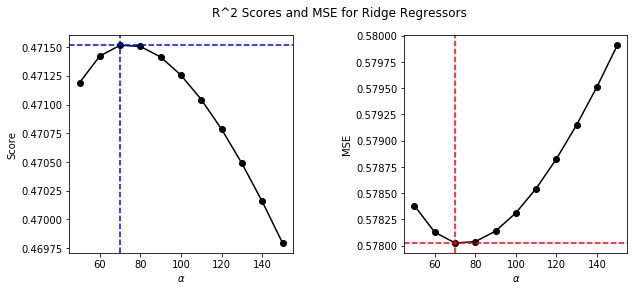

In [32]:
pr.ridge_plots(r_alphas, X_train, y_train, X_test, y_test)

In [33]:
## LASSO

In [34]:
from sklearn.linear_model import Lasso
lasso = Lasso(fit_intercept=False, alpha=1.0)
lasso.fit(X_train, y_train)
yl_pred = lasso.predict(X_test)

print(rcv.get_params())
print()
print(f'R^2 score for lasso model is {lasso.score(X_test, y_test)}')
print(f'Mean squared error for lasso model is {mean_squared_error(y_test, yl_pred)}')

{'alphas': array([ 50.,  60.,  70.,  80.,  90., 100., 110., 120., 130., 140., 150.]), 'cv': None, 'fit_intercept': False, 'gcv_mode': None, 'normalize': False, 'scoring': None, 'store_cv_values': False}

R^2 score for lasso model is -0.0005518830981687817
Mean squared error for lasso model is 1.0943486531908453


In [35]:
## MODEL COEFFICIENTS
print(f'This model kept {sum(lasso.coef_ != 0)} of {X_train.shape[1]} features')
print()
print(lasso.coef_)

This model kept 0 of 179 features

[-0. -0. -0. -0. -0. -0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.
 -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.
 -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0. -0.  0.
 -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.
 -0. -0.  0. -0.  0.  0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.  0.
 -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0.  0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
 -0.  0. -0.  0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0. -0.  0.  0.  0.
 -0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]


In [36]:
#testing again with different alpha

lasso = Lasso(fit_intercept=False, alpha=0.001)
lasso.fit(X_train, y_train)
yl_pred = lasso.predict(X_test)

print(lasso.get_params())
print()
print(f'R^2 score for lasso model is {lasso.score(X_test, y_test)}')
print(f'Mean squared error for lasso model is {mean_squared_error(y_test, yl_pred)}')

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': False, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}

R^2 score for lasso model is 0.46996387690604996
Mean squared error for lasso model is 0.5797243773648972


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6008167357094862, tolerance: 0.244784339444934
  positive)


In [37]:
## MODEL COEFFICIENTS
print(f'This model kept {sum(lasso.coef_ != 0)} of {X_train.shape[1]} features')
print()
print(lasso.coef_)

This model kept 133 of 179 features

[-6.56745468e-02 -1.38299378e-01  0.00000000e+00 -4.37851202e-02
 -0.00000000e+00  0.00000000e+00  9.24529175e-02  3.32897217e-01
 -7.35479349e-02 -6.26867186e-01 -2.62725904e-02  1.05556294e-01
  1.47371114e-03  1.01675685e-02  7.80291310e-02  5.12501065e-03
  4.82722350e-02 -5.03991585e-02  1.57858230e-01  2.66971817e-02
 -5.32181595e-02  7.80070716e-02  1.51658476e-02  0.00000000e+00
  0.00000000e+00  3.84786843e-03 -5.18199747e-02 -1.63384315e-01
  8.69922954e-02  6.90030662e-02 -7.26714398e-02  4.08047614e-02
  1.47338535e-01  2.92123306e-02  8.50500108e-03 -0.00000000e+00
 -0.00000000e+00  4.17683850e-02  0.00000000e+00  4.78967951e-02
 -5.71056818e-02  6.07976463e-03 -1.10306825e-01 -9.73876846e-02
  8.36624050e-02 -1.64256167e-02 -0.00000000e+00 -3.58749246e-02
 -3.35370380e-02 -1.23795649e-02  0.00000000e+00  2.60609566e-02
 -8.49819242e-02 -1.43794819e-02  7.83371447e-02 -0.00000000e+00
  7.70753774e-03 -0.00000000e+00 -6.79449435e-02 -4.4

In [38]:
##LASSO with cross validation
from sklearn.linear_model import LassoCV
l_alphas = np.logspace(-4, -1, 20)
lcv = LassoCV(max_iter=10000, fit_intercept=False, alphas=l_alphas)
lcv.fit(X_train, y_train)
ylcv_pred = lcv.predict(X_test)

print(lcv.get_params())
print()
print(f'R^2 score for lasso CV model is {lcv.score(X_test, y_test)}')
print(f'Mean squared error for lasso CV model is {mean_squared_error(y_test, ylcv_pred)}')
print(f'CV model chose alpha: {lcv.alpha_}')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4361231456945234, tolerance: 0.15532413120931293
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

{'alphas': array([0.0001    , 0.00014384, 0.00020691, 0.00029764, 0.00042813,
       0.00061585, 0.00088587, 0.00127427, 0.00183298, 0.00263665,
       0.00379269, 0.00545559, 0.0078476 , 0.01128838, 0.01623777,
       0.02335721, 0.03359818, 0.0483293 , 0.06951928, 0.1       ]), 'copy_X': True, 'cv': 'warn', 'eps': 0.001, 'fit_intercept': False, 'max_iter': 10000, 'n_alphas': 100, 'n_jobs': None, 'normalize': False, 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': False}

R^2 score for lasso CV model is 0.4741245724104668
Mean squared error for lasso CV model is 0.5751736373198165
CV model chose alpha: 0.0026366508987303583


In [39]:
## MODEL COEFFICIENTS
print(f'This model kept {sum(lcv.coef_ != 0)} of {X_train.shape[1]} features')
print()
print(lcv.coef_)

This model kept 102 of 179 features

[-5.00481033e-02 -1.21134099e-01  0.00000000e+00 -4.05986370e-02
 -0.00000000e+00  0.00000000e+00  7.25065256e-02  3.27894660e-01
 -0.00000000e+00 -5.26537346e-01 -1.16828620e-02  1.31365973e-01
  0.00000000e+00  9.47100435e-03  8.22201749e-02  0.00000000e+00
  3.05667463e-02 -0.00000000e+00  9.83362370e-02  2.14204034e-02
 -6.90720893e-02  6.97499515e-02  1.08811511e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -4.97562782e-02 -1.60396097e-02
  8.09053967e-02  0.00000000e+00 -6.66217978e-02  4.33507530e-02
  1.51482008e-01  2.04657323e-02  4.24097465e-03 -0.00000000e+00
 -0.00000000e+00  2.75819528e-02  0.00000000e+00  0.00000000e+00
 -6.46749079e-02  6.73891856e-03 -7.69648205e-02 -7.92099878e-02
  8.54997512e-02 -0.00000000e+00 -0.00000000e+00 -3.86216433e-02
 -0.00000000e+00 -1.13581636e-02  0.00000000e+00  2.37049795e-02
 -0.00000000e+00 -1.51776027e-02  6.06381590e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.78707193e-02 -3.7

In [40]:
## PLOT Lasso models

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 387.34052722398604, tolerance: 0.24477487393674652
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 350.53547218875724, tolerance: 0.24477487393674652
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 267.5522576139476, tolerance: 0.24477487393674652
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duali

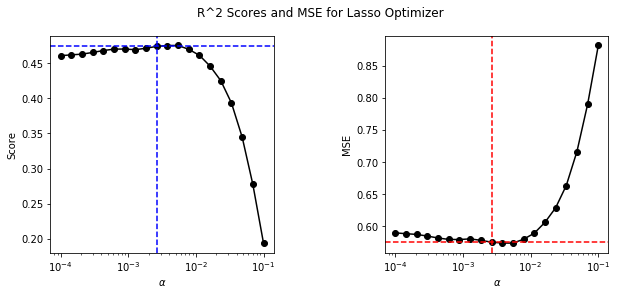

In [41]:
pr.lasso_plots(l_alphas, X_train, y_train, X_test, y_test)

In [42]:
## ELASTIC NET

In [43]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet(fit_intercept=False, alpha=1.0, l1_ratio=0.5)
elasticNet.fit(X_train, y_train)
ye_pred = elasticNet.predict(X_test)

print(elasticNet.get_params())
print()
print(f'R^2 score for Elastic Net model is {elasticNet.score(X_test, y_test)}')
print(f'Mean squared error for Elastic Net model is {mean_squared_error(y_test, ye_pred)}')

{'alpha': 1.0, 'copy_X': True, 'fit_intercept': False, 'l1_ratio': 0.5, 'max_iter': 1000, 'normalize': False, 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}

R^2 score for Elastic Net model is -0.0005518830981687817
Mean squared error for Elastic Net model is 1.0943486531908453


In [44]:
## MODEL COEFFICIENTS
print(f'This model kept {sum(elasticNet.coef_ != 0)} of {X_train.shape[1]} features')
print()
print(elasticNet.coef_)

This model kept 0 of 179 features

[-0. -0. -0. -0. -0. -0.  0.  0.  0. -0.  0.  0.  0. -0.  0. -0. -0. -0.
 -0.  0. -0.  0.  0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0.
 -0. -0. -0. -0. -0.  0. -0. -0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.
 -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0.  0.  0. -0.  0.
 -0.  0. -0.  0. -0.  0. -0. -0. -0.  0. -0. -0.  0. -0.  0.  0.  0. -0.
 -0. -0.  0. -0.  0.  0. -0. -0. -0.  0.  0. -0. -0. -0. -0. -0. -0.  0.
 -0. -0.  0. -0.  0. -0. -0. -0. -0. -0.  0. -0. -0. -0.  0. -0. -0.  0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.  0.
 -0.  0. -0.  0. -0.  0.  0.  0. -0.  0.  0. -0.  0.  0. -0.  0.  0.  0.
 -0.  0. -0.  0.  0.  0. -0.  0. -0.  0.  0. -0.  0.  0.  0.  0. -0.]


In [45]:
## ELASTIC NET CV
from sklearn.linear_model import ElasticNetCV

In [46]:
from sklearn.linear_model import ElasticNetCV
e_ratios = [0.1, 0.25, 0.5, 0.75, 0.9]
e_alphas = np.logspace(-3, -1, 20)
encv = ElasticNetCV(fit_intercept=False, l1_ratio=e_ratios, alphas=e_alphas)
encv.fit(X_train, y_train)
yencv_pred = encv.predict(X_test)

print(encv.get_params())
print()
print(f'R^2 score for lasso CV model is {encv.score(X_test, y_test)}')
print(f'Mean squared error for lasso CV model is {mean_squared_error(y_test, yencv_pred)}')
print(f'CV model chose alpha: {encv.alpha_}')
print(f'CV model chose l1 ratio: {encv.l1_ratio_}')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2303812353053445, tolerance: 0.15532413120931293
  tol, rng, random, positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of 

{'alphas': array([0.001     , 0.00127427, 0.00162378, 0.00206914, 0.00263665,
       0.00335982, 0.00428133, 0.00545559, 0.00695193, 0.00885867,
       0.01128838, 0.0143845 , 0.01832981, 0.02335721, 0.02976351,
       0.0379269 , 0.0483293 , 0.06158482, 0.078476  , 0.1       ]), 'copy_X': True, 'cv': 'warn', 'eps': 0.001, 'fit_intercept': False, 'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9], 'max_iter': 1000, 'n_alphas': 100, 'n_jobs': None, 'normalize': False, 'positive': False, 'precompute': 'auto', 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'verbose': 0}

R^2 score for lasso CV model is 0.47326778279402826
Mean squared error for lasso CV model is 0.5761107467078016
CV model chose alpha: 0.0026366508987303583
CV model chose l1 ratio: 0.9


In [47]:
## MODEL COEFFICIENTS
print(f'This model kept {sum(encv.coef_ != 0)} of {X_train.shape[1]} features')
print()
print(encv.coef_)

This model kept 104 of 179 features

[-5.22740548e-02 -1.23816639e-01  0.00000000e+00 -4.12108851e-02
 -0.00000000e+00  0.00000000e+00  7.45400873e-02  3.24890234e-01
 -0.00000000e+00 -5.36616487e-01 -1.32906562e-02  1.29315651e-01
  0.00000000e+00  1.00793421e-02  8.22566090e-02  0.00000000e+00
  3.24685513e-02 -0.00000000e+00  1.01578858e-01  2.16009469e-02
 -7.04016068e-02  7.08831646e-02  1.13836984e-02  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.03398332e-02 -2.38817818e-02
  8.16021206e-02  0.00000000e+00 -6.67267135e-02  4.31782875e-02
  1.51056985e-01  2.17294983e-02  4.97125065e-03 -0.00000000e+00
 -0.00000000e+00  3.00901641e-02  0.00000000e+00  0.00000000e+00
 -6.43522791e-02  6.84523404e-03 -8.21815888e-02 -8.33307166e-02
  8.46962353e-02 -0.00000000e+00 -0.00000000e+00 -3.86929300e-02
 -0.00000000e+00 -1.21668783e-02  0.00000000e+00  2.43452878e-02
 -0.00000000e+00 -1.57323492e-02  6.18887867e-02 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -5.89104648e-02 -3.8

In [48]:
##Plotting Elastic Net

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 352.6321086780413, tolerance: 0.24477487393674652
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276.4276968690996, tolerance: 0.24477487393674652
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175.0511082019798, tolerance: 0.24477487393674652
  positive)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

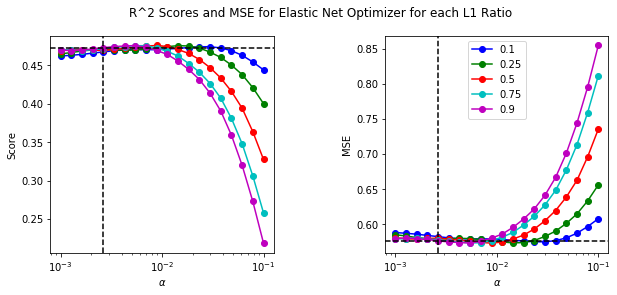

In [49]:
pr.elasticnet_plots(e_alphas, e_ratios, X_train, y_train, X_test, y_test)

In [50]:
## BONUS MODEL

In [51]:
## RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)
forest.fit(X_train, y_train)
yf_pred = forest.predict(X_test)

print(forest.get_params())
print()
print(f'Mean squared error for Random Forest model is {mean_squared_error(y_test, yf_pred)}')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


{'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Mean squared error for Random Forest model is 0.49032300128512907
